<a href="https://www.kaggle.com/code/ibrahimawad02/covid-time-series-eda?scriptVersionId=142158032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from warnings import filterwarnings
filterwarnings("ignore")

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/covid-confirmed-global/confirmed_global.csv", sep = ',', encoding = 'utf-8')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,88549,88730,88800,88930,89009,89071,89386,89592,89783,89918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


In [4]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21', '4/7/21',
       '4/8/21', '4/9/21', '4/10/21'],
      dtype='object', length=449)

<span style = 'font-size:18px;'> We can drop Latitude and Longitude since we have the country name </span>

In [5]:
df.isnull().sum()

Province/State    189
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
4/6/21              0
4/7/21              0
4/8/21              0
4/9/21              0
4/10/21             0
Length: 449, dtype: int64

In [6]:
df['Province/State'].isnull().sum()/df.shape[0]*100

68.97810218978103

In [7]:
# Will drop the province state column because it is missing 69% of the data
df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

***
# Analysis

In [8]:
df.groupby('Country/Region').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
Albania,0,0,0,0,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
Algeria,0,0,0,0,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
Andorra,0,0,0,0,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
Angola,0,0,0,0,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897
Yemen,0,0,0,0,0,0,0,0,0,0,...,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276


In [9]:
timec = pd.DataFrame(df.drop("Country/Region", axis = 1).sum())
timec

,0
1/22/20,557
1/23/20,655
1/24/20,941
1/25/20,1433
1/26/20,2118
...,...
4/6/21,132419139
4/7/21,133103485
4/8/21,133943335
4/9/21,134691380


In [10]:
timec.index = pd.to_datetime(timec.index)
timec.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10'],
              dtype='datetime64[ns]', length=445, freq=None)

<Axes: >

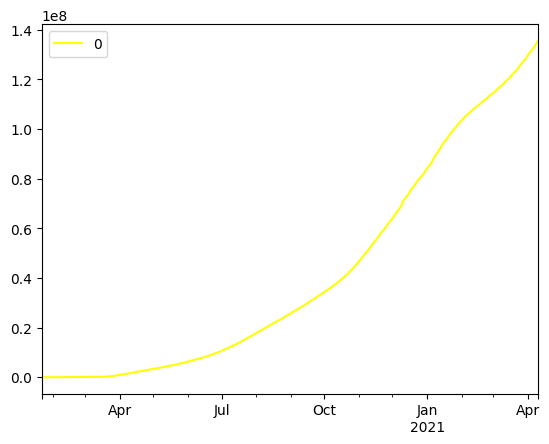

In [11]:
timec.plot(color = 'yellow')

### The previous plot shows the number of confirmed covid cases through time. It reached almost 135.4 millions.

In [12]:
time = timec.copy()
time['month'] = time.index.month_name()
time

,0,month
2020-01-22,557,January
2020-01-23,655,January
2020-01-24,941,January
2020-01-25,1433,January
2020-01-26,2118,January
...,...,...
2021-04-06,132419139,April
2021-04-07,133103485,April
2021-04-08,133943335,April
2021-04-09,134691380,April


In [13]:
time.groupby('month').sum()

,0
month,
April,1386837358
August,671685765
December,2295677499
February,3054249979
January,2916286157
July,431780006
June,246660148
March,3764266205
May,145211078


In [14]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
time['month'] = pd.Categorical(time['month'], categories=months, ordered=True)

In [15]:
confirms_per_month = time.groupby('month').sum().sort_values(by = 'month')
confirms_per_month

,0
month,
January,2916286157
February,3054249979
March,3764266205
April,1386837358
May,145211078
June,246660148
July,431780006
August,671685765
September,894816957


In [16]:
con_mean_month = time.groupby('month').mean().sort_values(by = 'month')

<Axes: xlabel='month'>

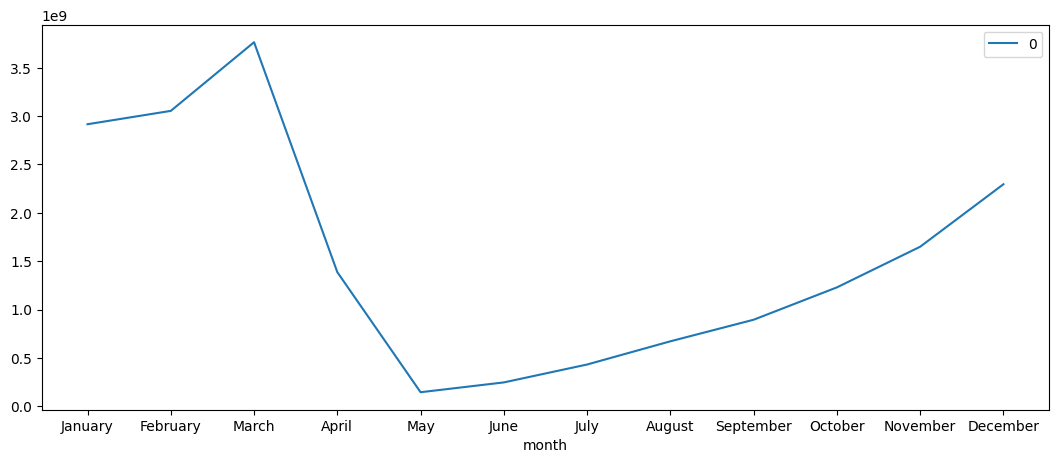

In [17]:
plt.figure(figsize=(13, 5))
sns.lineplot(data = confirms_per_month)

### From the previous plot we can find that Covid was more dangerous in the cold months (November to April)

***
***
# Death Analysis

In [18]:
df = pd.read_csv("/kaggle/input/covid-confirmed-global/deaths_global.csv", sep = ',', encoding = 'utf-8')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3096,3099,3102,3105,3108,3112,3116,3119,3123,3126
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,115,116,117,117,117,117,119,120,120,120
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,538,538,540,542,543,547,547,549,549,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,2645,2661,2681,2706,2716,2735,2753,2781,2812,2838
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,906,916,932,946,955,976,986,1004,1022,1031
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1212,1215,1215,1220,1222,1224,1224,1225,1226,1226


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


In [20]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21', '4/7/21',
       '4/8/21', '4/9/21', '4/10/21'],
      dtype='object', length=449)

<span style = 'font-size:18px;'> We can drop Latitude and Longitude since we have the country name </span>

In [21]:
df.isnull().sum()

Province/State    189
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
4/6/21              0
4/7/21              0
4/8/21              0
4/9/21              0
4/10/21             0
Length: 449, dtype: int64

In [22]:
df['Province/State'].isnull().sum()/df.shape[0]*100

68.97810218978103

In [23]:
# Will drop the province state column because it is missing 69% of the data
df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

***
# Analysis

In [24]:
df.groupby('Country/Region').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521
Albania,0,0,0,0,0,0,0,0,0,0,...,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310
Algeria,0,0,0,0,0,0,0,0,0,0,...,3096,3099,3102,3105,3108,3112,3116,3119,3123,3126
Andorra,0,0,0,0,0,0,0,0,0,0,...,115,116,117,117,117,117,119,120,120,120
Angola,0,0,0,0,0,0,0,0,0,0,...,538,538,540,542,543,547,547,549,549,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,2645,2661,2681,2706,2716,2735,2753,2781,2812,2838
Yemen,0,0,0,0,0,0,0,0,0,0,...,906,916,932,946,955,976,986,1004,1022,1031


In [25]:
time = pd.DataFrame(df.drop("Country/Region", axis = 1).sum())
time

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
4/6/21,2872453
4/7/21,2887278
4/8/21,2901909
4/9/21,2915400


In [26]:
time.index = pd.to_datetime(time.index)
time.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10'],
              dtype='datetime64[ns]', length=445, freq=None)

<Axes: >

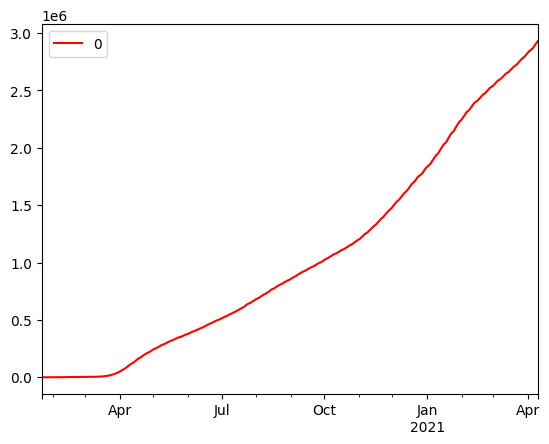

In [27]:
time.plot(color = 'red')

### The previous plot shows the number of death due to covid through time. It reached almost 2.93 millions in the last day.

In [28]:
time['month'] = time.index.month_name()
time

,0,month
2020-01-22,17,January
2020-01-23,18,January
2020-01-24,26,January
2020-01-25,42,January
2020-01-26,56,January
...,...,...
2021-04-06,2872453,April
2021-04-07,2887278,April
2021-04-08,2901909,April
2021-04-09,2915400,April


In [29]:
time.groupby('month').sum()

,0
month,
April,33091493
August,23813807
December,51255694
February,67303369
January,62897399
July,18283640
June,13297445
March,83325313
May,9684441


In [30]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
time['month'] = pd.Categorical(time['month'], categories=months, ordered=True)

In [31]:
deaths_per_month = time.groupby('month').sum().sort_values(by = 'month')
deaths_per_month

,0
month,
January,62897399
February,67303369
March,83325313
April,33091493
May,9684441
June,13297445
July,18283640
August,23813807
September,28125226


In [32]:
death_mean_month = time.groupby('month').mean().sort_values(by = 'month')

<Axes: xlabel='month'>

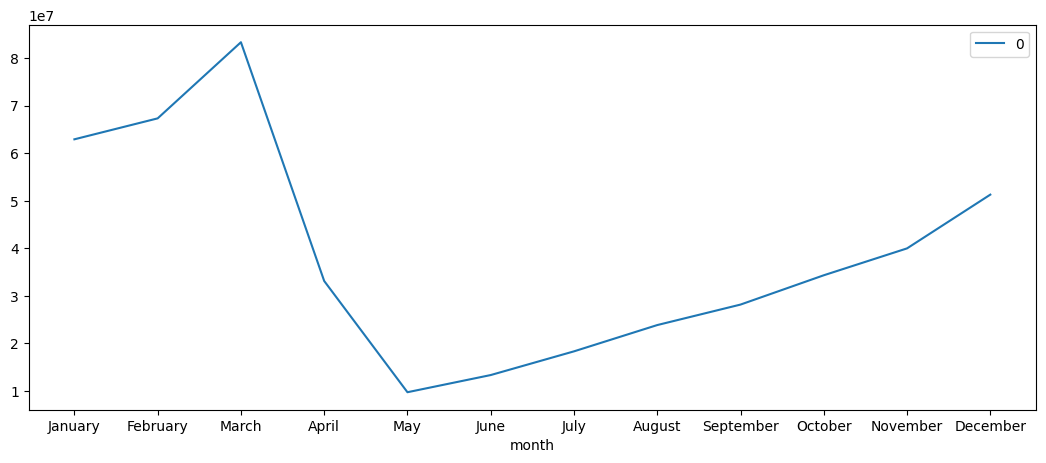

In [33]:
plt.figure(figsize=(13, 5))
sns.lineplot(data = deaths_per_month)

### From the previous plot we can find that Covid was more dangerous in the cold months (November to April)

***
***
# Recovered Analysis

In [34]:
df = pd.read_csv("/kaggle/input/covid-confirmed-global/recovered_global.csv", sep = ',', encoding = 'utf-8')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,51788,51798,51802,51885,51902,51928,51940,51956,51961,51962
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,91875,92500,93173,93842,94431,95035,95600,96129,96672,97206
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,81632,81729,81813,81896,81994,82096,82192,82289,82392,82493
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11365,11401,11428,11474,11523,11570,11616,11692,11732,11770
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20508,20867,20871,20879,21452,21489,21545,21557,21589,21890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2359,2383,2383,2383,2416,2422,2429,2429,2429,2429
255,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,217224,217224,220418,222007,223249,224552,226090,227988,229876,231288
256,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1682,1691,1715,1738,1772,1822,1886,1946,1987,2027
257,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,84698,84825,85017,85068,85178,85338,85409,85446,85559,86813


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 908.6+ KB


In [36]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21', '4/7/21',
       '4/8/21', '4/9/21', '4/10/21'],
      dtype='object', length=449)

<span style = 'font-size:18px;'> We can drop Latitude and Longitude since we have the country name </span>

In [37]:
df.isnull().sum()

Province/State    190
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/6/21              0
4/7/21              0
4/8/21              0
4/9/21              0
4/10/21             0
Length: 449, dtype: int64

In [38]:
df['Province/State'].isnull().sum()/df.shape[0]*100

73.35907335907336

In [39]:
# Will drop the province state column because it is missing 73% of the data
df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

***
# Analysis

In [40]:
df.groupby('Country/Region').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,51788,51798,51802,51885,51902,51928,51940,51956,51961,51962
Albania,0,0,0,0,0,0,0,0,0,0,...,91875,92500,93173,93842,94431,95035,95600,96129,96672,97206
Algeria,0,0,0,0,0,0,0,0,0,0,...,81632,81729,81813,81896,81994,82096,82192,82289,82392,82493
Andorra,0,0,0,0,0,0,0,0,0,0,...,11365,11401,11428,11474,11523,11570,11616,11692,11732,11770
Angola,0,0,0,0,0,0,0,0,0,0,...,20508,20867,20871,20879,21452,21489,21545,21557,21589,21890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,2359,2383,2383,2383,2416,2422,2429,2429,2429,2429
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,217224,217224,220418,222007,223249,224552,226090,227988,229876,231288
Yemen,0,0,0,0,0,0,0,0,0,0,...,1682,1691,1715,1738,1772,1822,1886,1946,1987,2027


In [41]:
time = pd.DataFrame(df.drop("Country/Region", axis = 1).sum())
time

,0
1/22/20,30
1/23/20,32
1/24/20,39
1/25/20,42
1/26/20,56
...,...
4/6/21,75186315
4/7/21,75666178
4/8/21,76113059
4/9/21,76508889


In [42]:
time.index = pd.to_datetime(time.index)
time.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10'],
              dtype='datetime64[ns]', length=445, freq=None)

<Axes: >

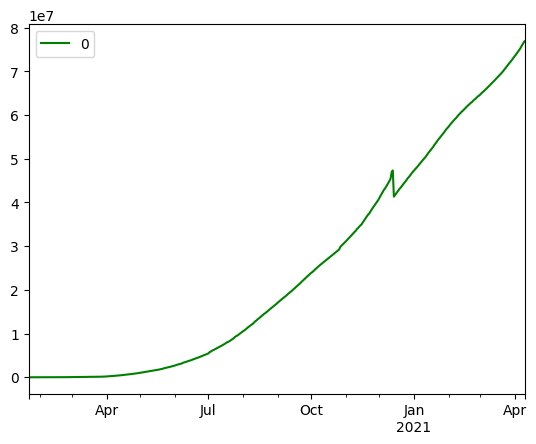

In [43]:
time.plot(color = 'green')

### The previous plot shows the number of recovered  cases from covid through time. It almost reached 76.9 millions.

In [44]:
time['month'] = time.index.month_name()
time

,0,month
2020-01-22,30,January
2020-01-23,32,January
2020-01-24,39,January
2020-01-25,42,January
2020-01-26,56,January
...,...,...
2021-04-06,75186315,April
2021-04-07,75666178,April
2021-04-08,76113059,April
2021-04-09,76508889,April


In [45]:
time.groupby('month').sum()

,0
month,
April,767322210
August,423525909
December,1365728170
February,1711514754
January,1615032877
July,242238492
June,118880570
March,2129187599
May,54100899


In [46]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
time['month'] = pd.Categorical(time['month'], categories=months, ordered=True)

In [47]:
recovered_per_month = time.groupby('month').sum().sort_values(by = 'month')
recovered_per_month

,0
month,
January,1615032877
February,1711514754
March,2129187599
April,767322210
May,54100899
June,118880570
July,242238492
August,423525909
September,608664233


In [48]:
rec_mean_month = time.groupby('month').mean().sort_values(by = 'month')
rec_mean_month

,0
month,
January,3.939105e+07
February,3.002657e+07
March,3.434174e+07
April,1.918306e+07
May,1.745190e+06
June,3.962686e+06
July,7.814145e+06
August,1.366213e+07
September,2.028881e+07


<Axes: xlabel='month'>

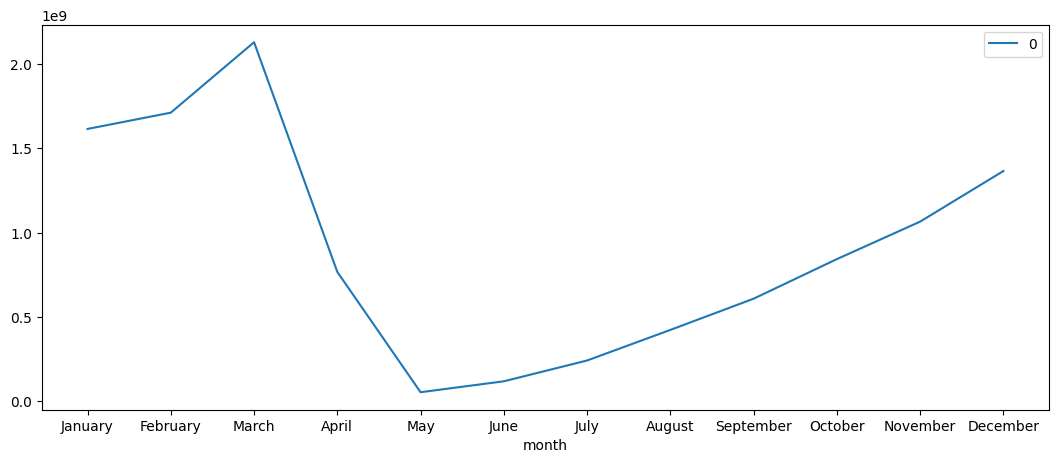

In [49]:
plt.figure(figsize=(13, 5))
sns.lineplot(data = recovered_per_month)

### From the previous plot we can find that the numbers of recovered cases is proportional to the number of confirmed cases, so to compare between confirmed, recovered and deaths data we will use the mean values

In [50]:
collected_month = pd.DataFrame()
collected_month['con_month'] = con_mean_month
collected_month['death_month'] = death_mean_month
collected_month['rec_month'] = rec_mean_month
collected_month

,con_month,death_month,rec_month
month,,,
January,7.112893e+07,1.534083e+06,3.939105e+07
February,5.358333e+07,1.180761e+06,3.002657e+07
March,6.071397e+07,1.343957e+06,3.434174e+07
April,3.467093e+07,8.272873e+05,1.918306e+07
May,4.684228e+06,3.124013e+05,1.745190e+06
June,8.222005e+06,4.432482e+05,3.962686e+06
July,1.392839e+07,5.897948e+05,7.814145e+06
August,2.166728e+07,7.681873e+05,1.366213e+07
September,2.982723e+07,9.375075e+05,2.028881e+07


<Axes: xlabel='month'>

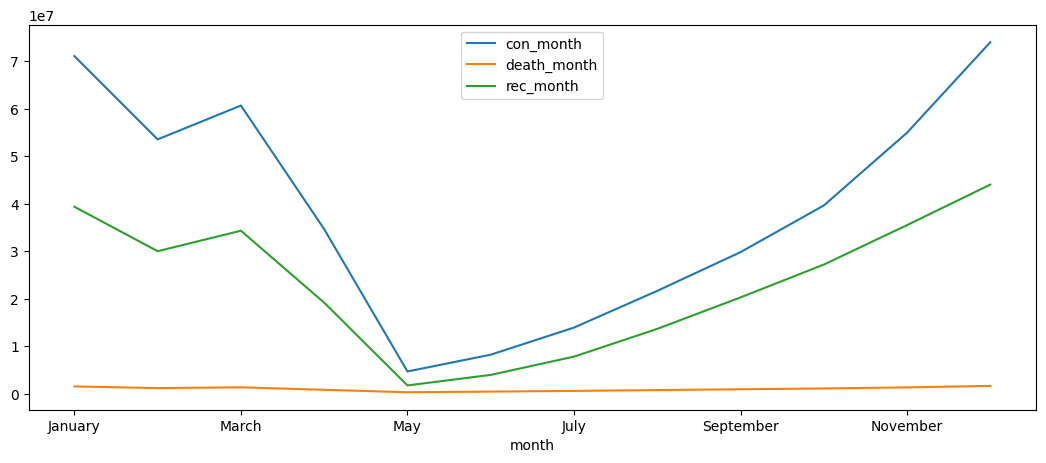

In [51]:
collected_month.plot(figsize=(13, 5))

### we can observe that recovery is directly proportional to confirmed cases numbers and has no relation to seasons but the confirmed numbers increases in cold months as we said previously

***
<span style = 'font-size:18px;'> We need to change the countries names to three letters code for the plotly express maps 

In [52]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=d6768bca3e27ffcd39917ebc65b954ecd75883f2e440d1545b48e8c9f628e124
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [53]:
import pycountry
def country_to_alpha3(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_3
        else:
            return None
    except LookupError:
        return None

In [54]:
df['Country_Code'] = df['Country/Region'].apply(country_to_alpha3)
df[['Country/Region','Country_Code']]

,Country/Region,Country_Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO
...,...,...
254,Vietnam,None
255,West Bank and Gaza,None
256,Yemen,YEM
257,Zambia,ZMB


In [55]:
df['Country_Code'].isnull().sum()

23

In [56]:
df[df['Country_Code'].isnull()]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,Country_Code
27,Bolivia,0,0,0,0,0,0,0,0,0,...,223760,224548,224998,225483,226787,227812,229036,230021,230807,None
31,Brunei,0,0,0,0,0,0,0,0,0,...,195,197,197,197,197,198,202,206,206,None
34,Burma,0,0,0,0,0,0,0,0,0,...,131802,131810,131813,131815,131819,131829,131834,131845,131846,None
78,Congo (Brazzaville),0,0,0,0,0,0,0,0,0,...,8208,8208,8208,8208,8208,8208,8208,8208,8208,None
79,Congo (Kinshasa),0,0,0,0,0,0,0,0,0,...,25512,25587,25587,25587,25841,25841,25841,25841,25841,None
81,Cote d'Ivoire,0,0,0,0,0,0,0,0,0,...,41281,41687,42071,42438,43130,43446,43758,44197,44197,None
89,Diamond Princess,0,0,0,0,0,0,0,0,0,...,699,699,699,699,699,699,699,699,699,None
127,Holy See,0,0,0,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,None
133,Iran,0,0,0,0,0,0,0,0,0,...,1633949,1642418,1650569,1658978,1667079,1675891,1684570,1693005,1702062,None
143,"Korea, South",0,0,0,0,0,0,0,0,0,...,96196,96589,96900,97363,97928,98360,98786,99301,100109,None


For me the important countries due to numbers and cultural relationship are
* Bolivia : BOL
* Brunei : BRN
* Congo (Brazzaville): COG
* Congo (Kinshasa): COD
* Côte d'Ivoire: CIV
* Iran: IRN
* South Korea: KOR
* Russia: RUS
* Moldova : MDA
* Syria: SYR
* Tanzania: TZA
* United States of America: USA
* Venezuela : VEN
* Vietnam: VNM
* West Bank and Gaza Strip: PSE

Source = https://www.iso.org/obp/ui/#search

In [57]:
countries = ['Bolivia', 'Brunei', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Iran', 'Korea, South', 'Russia', 'Moldova', 'Syria', 'Tanzania', 'US', 'Venezuela', 'Vietnam', 'West Bank and Gaza']
codes = ['BOL', 'BRN', 'COG', 'COD', 'CIV', 'IRN', 'KOR', 'RUS', 'MDA', 'SYR', 'TZA', 'USA', 'VEN', 'VNM', 'PSE']

for i in range(len(countries)):
    df['Country_Code'].loc[df['Country/Region'] == countries[i]] = codes[i]

In [58]:
df[df['Country_Code'].isnull()]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,Country_Code
34,Burma,0,0,0,0,0,0,0,0,0,...,131802,131810,131813,131815,131819,131829,131834,131845,131846,None
89,Diamond Princess,0,0,0,0,0,0,0,0,0,...,699,699,699,699,699,699,699,699,699,None
127,Holy See,0,0,0,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,None
144,Kosovo,0,0,0,0,0,0,0,0,0,...,75850,75850,75850,75850,78914,79702,80344,80344,80344,None
147,Laos,0,0,0,0,0,0,0,0,0,...,46,46,46,46,47,47,47,47,47,None
156,MS Zaandam,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,None
167,Micronesia,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,None
225,Taiwan*,0,0,0,0,0,0,0,0,0,...,987,992,997,1004,1004,1007,1007,1018,1020,None


In [59]:
df.drop('Country/Region', axis = 1)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,Country_Code
0,0,0,0,0,0,0,0,0,0,0,...,51798,51802,51885,51902,51928,51940,51956,51961,51962,AFG
1,0,0,0,0,0,0,0,0,0,0,...,92500,93173,93842,94431,95035,95600,96129,96672,97206,ALB
2,0,0,0,0,0,0,0,0,0,0,...,81729,81813,81896,81994,82096,82192,82289,82392,82493,DZA
3,0,0,0,0,0,0,0,0,0,0,...,11401,11428,11474,11523,11570,11616,11692,11732,11770,AND
4,0,0,0,0,0,0,0,0,0,0,...,20867,20871,20879,21452,21489,21545,21557,21589,21890,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,0,0,0,0,0,0,0,0,0,...,2383,2383,2383,2416,2422,2429,2429,2429,2429,VNM
255,0,0,0,0,0,0,0,0,0,0,...,217224,220418,222007,223249,224552,226090,227988,229876,231288,PSE
256,0,0,0,0,0,0,0,0,0,0,...,1691,1715,1738,1772,1822,1886,1946,1987,2027,YEM
257,0,0,0,0,0,0,0,0,0,0,...,84825,85017,85068,85178,85338,85409,85446,85559,86813,ZMB


- <span style = 'font-size:18px;'> Since the data is from 22 January 2020 to 10 April 2021 which is 16 months so we will notice the effect of Covid every four months to observe the quarters. 
- <span style = 'font-size:18px;'> We will take only the confirmed cases into account because it is highly correlated with deaths and recovery

In [60]:
fig = px.choropleth(df, locations="Country_Code",
                    color='1/22/20',
                    hover_name='Country/Region', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [61]:
fig = px.choropleth(df, locations="Country_Code",
                    color='5/22/20',
                    hover_name='Country/Region', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [62]:
fig = px.choropleth(df, locations="Country_Code",
                    color='9/22/20',
                    hover_name='Country/Region', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [63]:
fig = px.choropleth(df, locations="Country_Code",
                    color='1/22/21',
                    hover_name='Country/Region', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [64]:
fig = px.choropleth(df, locations="Country_Code",
                    color='4/10/21',
                    hover_name='Country/Region', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### From the previous we can conclude that at 10 April of 2021 Brazil and India had the most confirmed Corona cases, but that is not the best way to visualize this data because something like this does not show the percentage of confirmed cases in a population of a nation like India. A better visualization is bubble visualization which can be added in future versions.

## Modelling

In [65]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00


In [66]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(timec, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,  max_d = 1 ,        # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11193.914, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12234.356, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11205.807, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11962.995, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.010, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11184.530, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11196.631, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11174.561, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11197.583, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11153.797, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11152.859, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11884.142, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11135.240, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] i

***
## Thanks for reading
# Yours, **Ibrahim Hossam**